In [1]:
import pandas as pd

# Загрузка данных из CSV файла
dataset_path = 'data/dataset.csv'
df = pd.read_csv(dataset_path)
df.head()

,text,style,theme
0,АРХИТЕКТУРА В АНТРОПОЛОГИЧЕСКОМ ИЗМЕРЕНИИ\n\nГ...,научный,Культура
1,«Затем король упоминает о красивом доме канцле...,научный,Культура
2,"Основная проблема, связанная с использованием ...",научный,Культура
3,3 января в Доме культуры «Соболевский» прошел ...,официально-деловой,Культура
4,Отчёты по мероприятиям 2020-2022\n30.12.2022 Ю...,официально-деловой,Культура


In [2]:
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')

In [3]:
comment_words = '' 
stopwords = set(stop_words) 

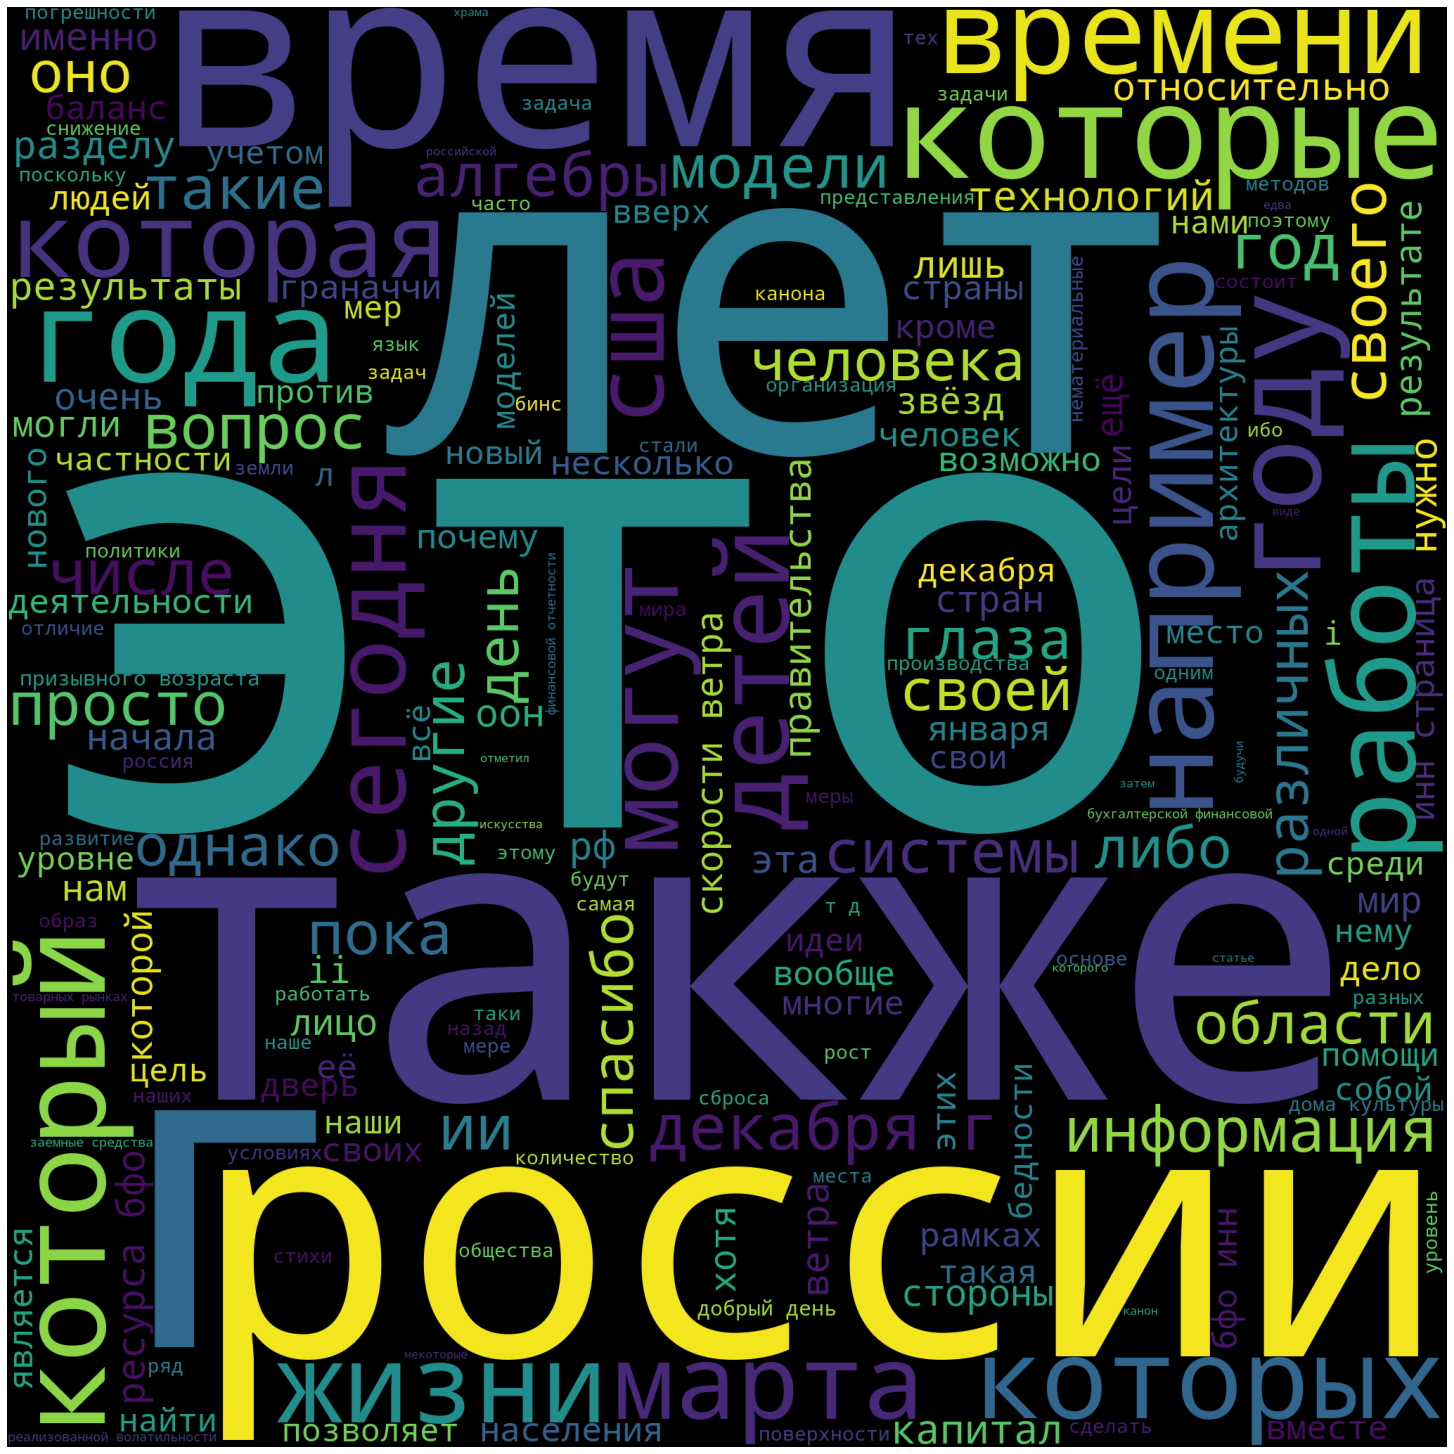

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for val in df['text']: 
      
    # typecaste each val to string 
    val = str(val) 
  

    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 2048, height = 2048, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [5]:
import nltk
import re
nltk.download('averaged_perceptron_tagger_ru')
from nltk.stem.snowball import SnowballStemmer

def cleanText(string):
    """This function deletes all symbols except Cyrilic and Base Latin alphabet,
    stopwords, functional parts of speech. Returns string of words stem."""
    # Common cleaning
    string = string.lower()
    string = re.sub(r"http\S+", "", string)
    string = str.replace(string,'Ё','е')
    string = str.replace(string,'ё','е')
    prog = re.compile('[А-Яа-яA-Za-z]+')
    words = prog.findall(string.lower())
    
    # Word Cleaning
    ## Stop Words
    stopwords = nltk.corpus.stopwords.words('russian')
    words = [w for w in words if w not in stopwords]
    ## Cleaning functional POS (Parts of Speech)
    functionalPos = {'CONJ', 'PRCL'}
    words = [w for w, pos in nltk.pos_tag(words, lang='rus') if pos not in functionalPos]
    ## Stemming
    stemmer = SnowballStemmer('russian')
    return ' '.join(list(map(stemmer.stem, words)))

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     C:\Users\AlexB\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!


In [6]:
df_pred = df
df_pred['text'] = list(map(cleanText, df['text']))

In [7]:
df_pred

,text,style,theme
0,архитектур антропологическ измерен главн цел с...,научный,Культура
1,зат корол упомина красив дом канцлер безбородк...,научный,Культура
2,основн проблем связа использован понят канон п...,научный,Культура
3,январ дом культур соболевск прошел праздничн к...,официально-деловой,Культура
4,отчет мероприят юн среднеканц приня участ ново...,официально-деловой,Культура
5,отчет работ учрежден культур красносулинск рай...,официально-деловой,Культура
6,москв настройк гэс март штраус шенберг дан анн...,публицистический,Культура
7,выбра главн сериал грядущ сезон сред нов проек...,публицистический,Культура
8,кембриджск университет изуч результат крупн эк...,публицистический,Культура
9,господ рамк нов закон замен текст open coll ро...,разговорный,Культура


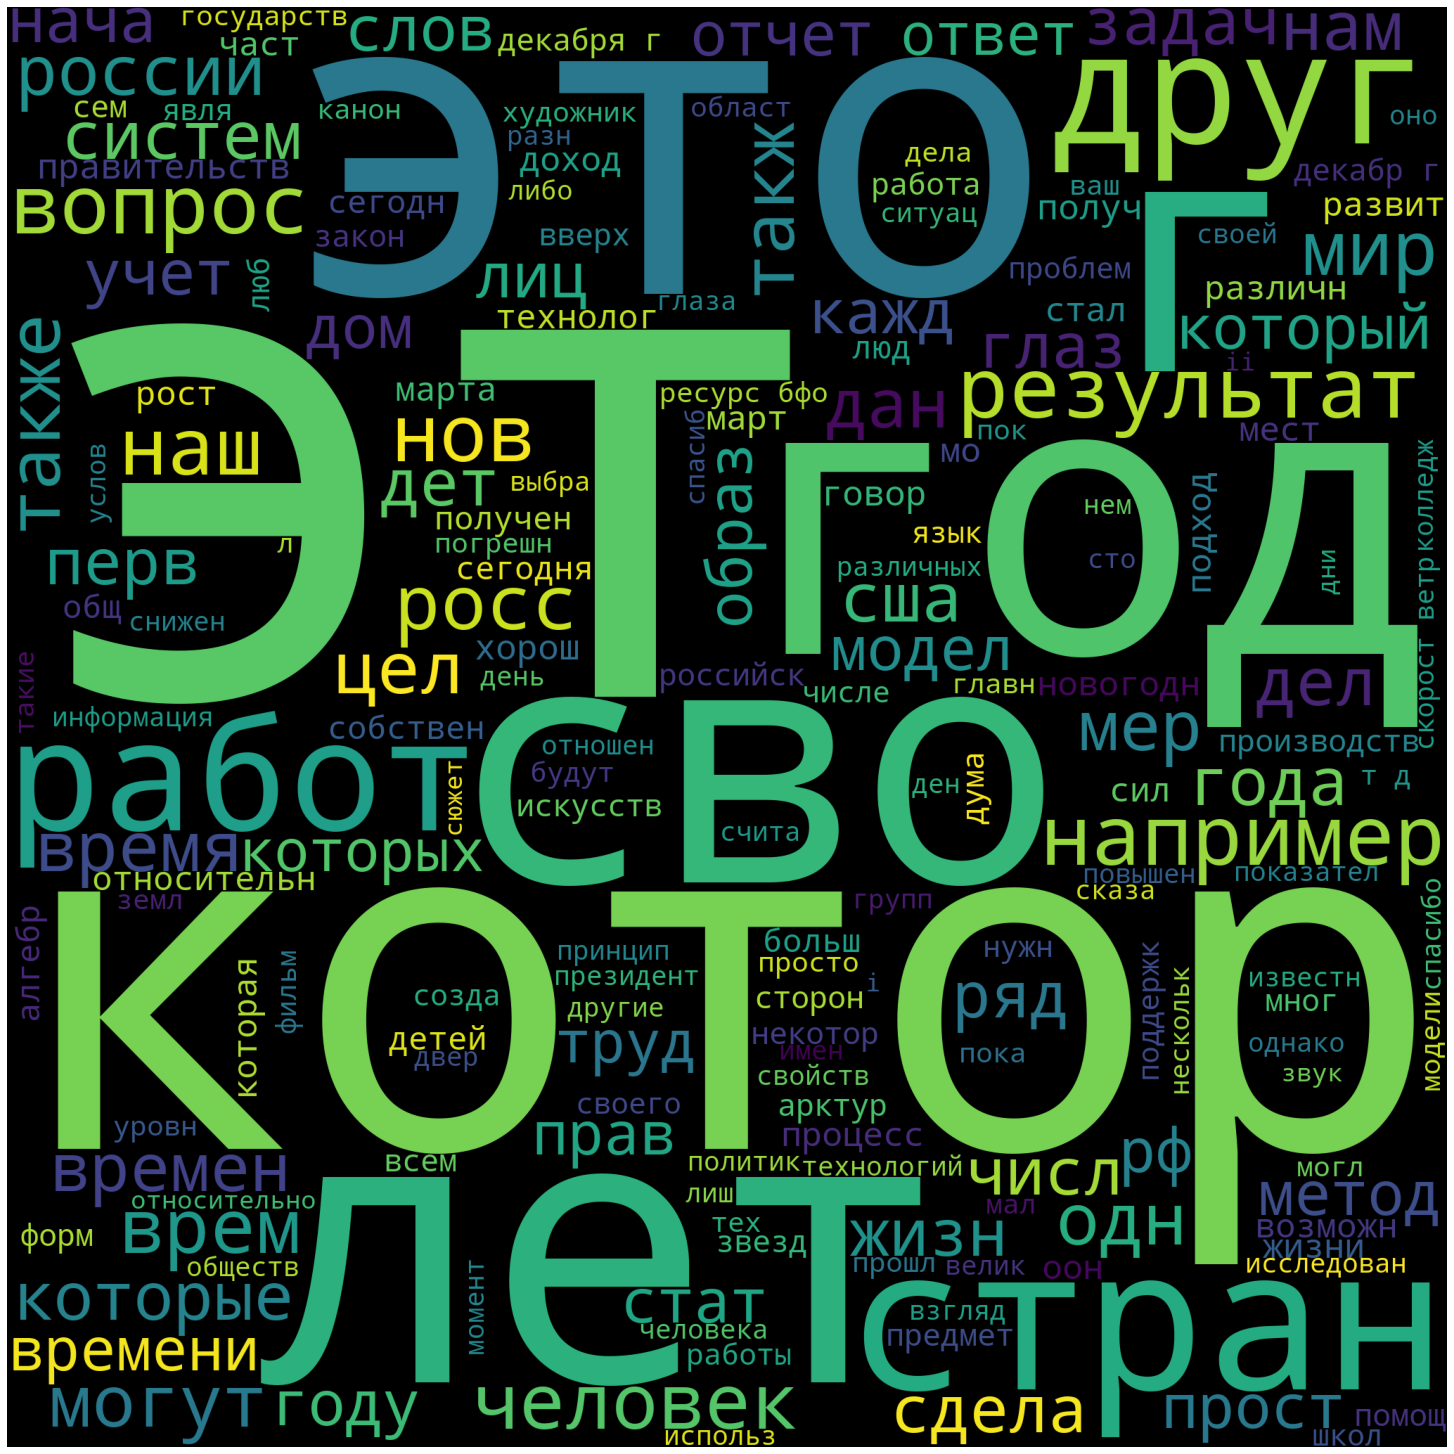

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for val in df_pred['text']: 
      
    # typecaste each val to string 
    val = str(val) 
  

    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 2048, height = 2048, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [15]:
df = df_pred

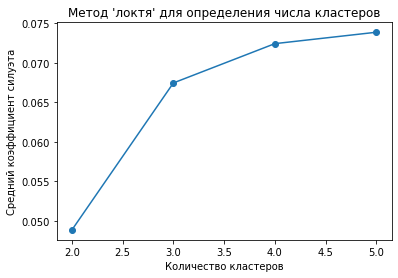

Оптимальное количество кластеров: 5
                                                 text  cluster_tf
0   архитектур антропологическ измерен главн цел с...           1
1   зат корол упомина красив дом канцлер безбородк...           1
2   основн проблем связа использован понят канон п...           1
3   январ дом культур соболевск прошел праздничн к...           4
4   отчет мероприят юн среднеканц приня участ ново...           4
5   отчет работ учрежден культур красносулинск рай...           4
6   москв настройк гэс март штраус шенберг дан анн...           1
7   выбра главн сериал грядущ сезон сред нов проек...           1
8   кембриджск университет изуч результат крупн эк...           0
9   господ рамк нов закон замен текст open coll ро...           1
10  сегодн март ден рожден певиц тэйлор дэйн говор...           1
11  геш остап уда ник наш артист пророчеств предуп...           1
12  познаком чарлз стрикленд правд говор голов при...           1
13  сидел спальн втор этаж смотрел зерка

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Замените данные на свои тексты
data_tf = df['text']

# Создаем объект TF-IDF векторизатора
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)

# Преобразуем тексты в TF-IDF векторы
tfidf_matrix = tfidf_vectorizer.fit_transform(data_tf)

# Попробуем разное количество кластеров и оценим качество кластеризации
min_clusters = 2
max_clusters = 5
silhouette_scores = []

for num_clusters in range(min_clusters, max_clusters + 1):
    clustering_model = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = clustering_model.fit_predict(tfidf_matrix.toarray())
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Визуализируем результаты методом "локтя"
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.title("Метод 'локтя' для определения числа кластеров")
plt.xlabel("Количество кластеров")
plt.ylabel("Средний коэффициент силуэта")
plt.show()

# Выбираем оптимальное количество кластеров
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters
print("Оптимальное количество кластеров:", optimal_num_clusters)

# Создаем объект иерархической кластеризации с оптимальным числом кластеров
clustering_model = AgglomerativeClustering(n_clusters=optimal_num_clusters)

# Применяем кластеризацию к TF-IDF векторам
cluster_labels_tf = clustering_model.fit_predict(tfidf_matrix.toarray())

# Добавляем метки кластеров к данным
clustered_data_tf = pd.DataFrame({"text": data_tf, "cluster_tf": cluster_labels_tf})

# Выводим результаты кластеризации
print(clustered_data_tf)

Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


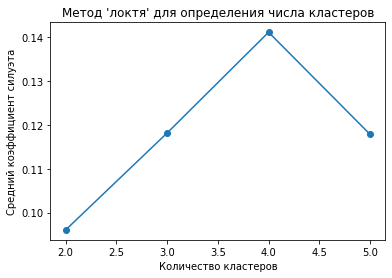

Оптимальное количество кластеров: 4
                                                 text  cluster_bert
0   архитектур антропологическ измерен главн цел с...             0
1   зат корол упомина красив дом канцлер безбородк...             0
2   основн проблем связа использован понят канон п...             0
3   январ дом культур соболевск прошел праздничн к...             0
4   отчет мероприят юн среднеканц приня участ ново...             0
5   отчет работ учрежден культур красносулинск рай...             0
6   москв настройк гэс март штраус шенберг дан анн...             0
7   выбра главн сериал грядущ сезон сред нов проек...             0
8   кембриджск университет изуч результат крупн эк...             1
9   господ рамк нов закон замен текст open coll ро...             0
10  сегодн март ден рожден певиц тэйлор дэйн говор...             0
11  геш остап уда ник наш артист пророчеств предуп...             0
12  познаком чарлз стрикленд правд говор голов при...             0
13  сидел сп

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import torch

data_bert = df['text']

# Инициализация токенизатора и модели BERT
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny")

# Получение векторов текстов
embeddings = []

for description in data_bert:
    inputs = tokenizer(description, return_tensors='pt', padding=True, truncation=True)
    outputs = model(**inputs)
    embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().detach())

embeddings = torch.stack(embeddings)

# Попробуем разное количество кластеров и оценим качество кластеризации
min_clusters = 2
max_clusters = 5
silhouette_scores = []

for num_clusters in range(min_clusters, max_clusters + 1):
    clustering_model = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = clustering_model.fit_predict(embeddings.cpu().numpy())
    silhouette_avg = silhouette_score(embeddings.cpu().numpy(), cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Визуализируем результаты методом "локтя"
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.title("Метод 'локтя' для определения числа кластеров")
plt.xlabel("Количество кластеров")
plt.ylabel("Средний коэффициент силуэта")
plt.show()

# Выбираем оптимальное количество кластеров
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters
print("Оптимальное количество кластеров:", optimal_num_clusters)

# Создаем объект иерархической кластеризации с оптимальным числом кластеров
clustering_model = AgglomerativeClustering(n_clusters=optimal_num_clusters)

# Применяем кластеризацию к векторам эмбеддингов
cluster_labels_bert = clustering_model.fit_predict(embeddings.cpu().numpy())

# Добавляем метки кластеров к данным
clustered_data_bert = pd.DataFrame({"text": data_bert, "cluster_bert": cluster_labels_bert})

# Выводим результаты кластеризации
print(clustered_data_bert)

## Визуализация

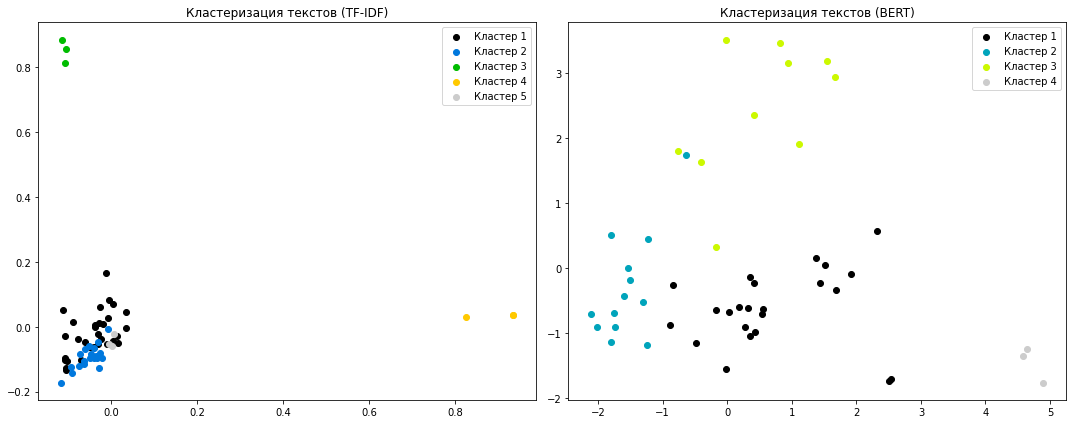

In [27]:
# Применяем метод главных компонент (PCA) для уменьшения размерности до 2D
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
tfidf_embeddings_2d = pca.fit_transform(tfidf_matrix.toarray())
embeddings_2d = pca.fit_transform(embeddings.cpu().numpy())

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# График для TF-IDF 
colors = plt.cm.nipy_spectral(np.linspace(0, 1, np.max(cluster_labels_tf) + 1))
for cluster_num in range(np.max(cluster_labels_tf) + 1):
    cluster_mask = (cluster_labels_tf == cluster_num)
    axes[0].scatter(tfidf_embeddings_2d[cluster_mask, 0], tfidf_embeddings_2d[cluster_mask, 1], color=colors[cluster_num], label=f'Кластер {cluster_num + 1}', cmap = 'Accent')
axes[0].set_title('Кластеризация текстов (TF-IDF)')
axes[0].legend()

# График для BERT
colors = plt.cm.nipy_spectral(np.linspace(0, 1, np.max(cluster_labels_bert) + 1))
for cluster_num in range(np.max(cluster_labels_bert) + 1):
    cluster_mask = (cluster_labels == cluster_num)
    axes[1].scatter(embeddings_2d[cluster_mask, 0], embeddings_2d[cluster_mask, 1], color=colors[cluster_num], label=f'Кластер {cluster_num + 1}', cmap = 'Accent')
axes[1].set_title('Кластеризация текстов (BERT)')
axes[1].legend()

# Отображение
plt.tight_layout()
plt.show()

In [19]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

# # Объединяем результаты двух кластеризаций
# merged_data = pd.merge(clustered_data_bert, clustered_data_tf, on='text', suffixes=('_bert', '_tf'))

# # Выбираем признаки для второй кластеризации
# # В данном случае, мы будем использовать столбцы cluster_bert и cluster_tf
# features = merged_data[['cluster_bert', 'cluster_tf']].values

# # Попробуем разное количество кластеров и оценим качество кластеризации
# min_clusters = 2
# max_clusters = 5
# silhouette_scores = []

# for num_clusters in range(min_clusters, max_clusters + 1):
#     clustering_model = KMeans(n_clusters=num_clusters)
#     cluster_labels = clustering_model.fit_predict(features)
#     silhouette_avg = silhouette_score(features, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# # Визуализируем результаты методом "локтя"
# plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
# plt.title("Метод 'локтя' для определения числа кластеров (второй уровень)")
# plt.xlabel("Количество кластеров")
# plt.ylabel("Средний коэффициент силуэта")
# plt.show()

# # Выбираем оптимальное количество кластеров
# optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters
# print("Оптимальное количество кластеров (второй уровень):", optimal_num_clusters)

# # Создаем объект KMeans с оптимальным числом кластеров
# clustering_model = KMeans(n_clusters=optimal_num_clusters)

# # Применяем кластеризацию ко вторым уровням кластеров
# second_level_clusters = clustering_model.fit_predict(features)

# # Добавляем метки второго уровня кластеров к объединенным данным
# merged_data['second_level_cluster'] = second_level_clusters

# # Выводим результаты второй кластеризации
# merged_data

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Объединяем результаты двух кластеризаций
merged_data = pd.merge(clustered_data_bert, clustered_data_tf, on='text', suffixes=('_bert', '_tf'))

# Выбираем признаки для второй кластеризации
# В данном случае, мы будем использовать столбцы cluster_bert и cluster_tf
features = merged_data[['cluster_bert', 'cluster_tf']].values

# Выбираем оптимальное количество кластеров
optimal_num_clusters = 5

# Создаем объект KMeans с оптимальным числом кластеров
clustering_model = KMeans(n_clusters=optimal_num_clusters)

# Применяем кластеризацию ко вторым уровням кластеров
second_level_clusters = clustering_model.fit_predict(features)

# Добавляем метки второго уровня кластеров к объединенным данным
merged_data['second_level_cluster'] = second_level_clusters

# Выводим результаты второй кластеризации
merged_data

,text,cluster_bert,cluster_tf,second_level_cluster
0,архитектур антропологическ измерен главн цел с...,0,1,1
1,зат корол упомина красив дом канцлер безбородк...,0,1,1
2,основн проблем связа использован понят канон п...,0,1,1
3,январ дом культур соболевск прошел праздничн к...,0,4,4
4,отчет мероприят юн среднеканц приня участ ново...,0,4,4
5,отчет работ учрежден культур красносулинск рай...,0,4,4
6,москв настройк гэс март штраус шенберг дан анн...,0,1,1
7,выбра главн сериал грядущ сезон сред нов проек...,0,1,1
8,кембриджск университет изуч результат крупн эк...,1,0,3
9,господ рамк нов закон замен текст open coll ро...,0,1,1


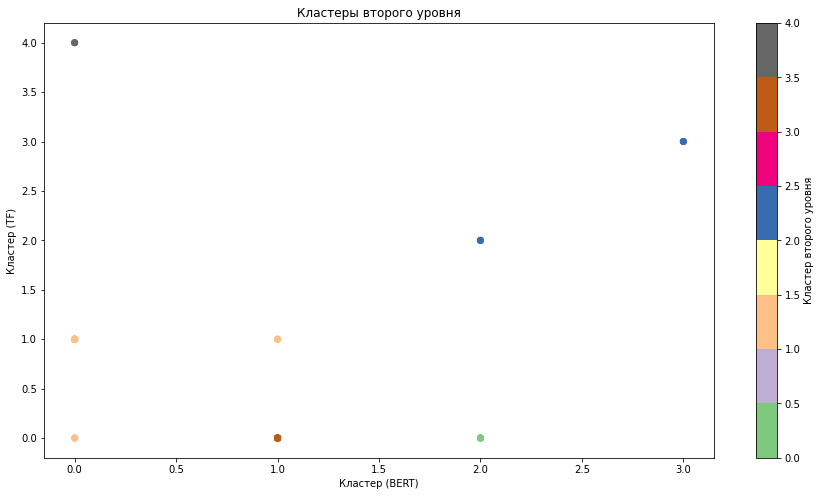

In [30]:
# Визуализация
plt.figure(figsize=(15, 8))
plt.scatter(merged_data['cluster_bert'], merged_data['cluster_tf'], c=merged_data['second_level_cluster'], cmap='Accent')
plt.xlabel('Кластер (BERT)')
plt.ylabel('Кластер (TF)')
plt.title('Кластеры второго уровня')
plt.colorbar(label='Кластер второго уровня')
plt.show()

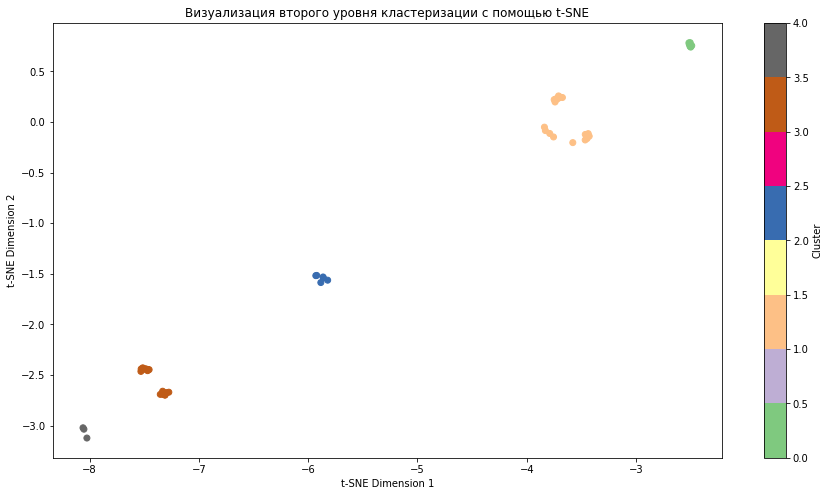

In [32]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Извлекаем метки кластеров второго уровня
second_level_clusters = merged_data['second_level_cluster']

# Применяем метод t-SNE для визуализации в 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(second_level_clusters.values.reshape(-1, 1))

# Создаем большой график
plt.figure(figsize=(15, 8))

# Визуализируем результаты второй кластеризации
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=second_level_clusters, cmap='Accent')
plt.title("Визуализация второго уровня кластеризации с помощью t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label='Cluster')
plt.show()


In [33]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Преобразуем текстовые метки тем и стилей в числовое представление
label_encoder = LabelEncoder()
true_theme_labels_numeric = label_encoder.fit_transform(df['theme'])
true_style_labels_numeric = label_encoder.fit_transform(df['style'])

# Извлекаем предсказанные метки кластеров из финальной модели
predicted_labels = merged_data['second_level_cluster']

# Вычисляем ARI для оценки сходства с исходными метками
ari_theme = adjusted_rand_score(true_theme_labels_numeric, predicted_labels)
ari_style = adjusted_rand_score(true_style_labels_numeric, predicted_labels)

print("ARI для тем:", round(ari_theme, 3))
print("ARI для стилей:", round(ari_style, 3))


ARI для тем: 0.228
ARI для стилей: 0.136


In [36]:
round(ari_theme + ari_style, 2)

0.36

![img](https://python-school.ru/wp-content/uploads/2020/07/1-6-660x371.jpg)

Предобработка текста повысила общую точность кластеризации на 10%. Это довольно мало. В дальнейшем можно улучшить методы предобработки или попробовать другие методы кластеризации. Из очевидных моментов: 
- без предобработки точность кластеризации текстов по темам близка у нулю, но стиль определяется; 
- с предобработкой точность кластеризации текстов по темам увеличилась на 84%, но стиль определить уже затруднительно;

Следовательно, применение морфологического анализа обуславливается конечной целью кластеризации.